Ноутбук я запускаю у себя локально. Ранее я уже скачивал датасеты из kaggle, поэтому у меня уже лежит мой токен в /Users/User/.kaggle/.
Поэтому эти шаги пропускаю

# Imports

In [144]:
# imports 
import zipfile
import warnings

import kaggle
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeClassifier, LogisticRegression
from sklearn.metrics import classification_report
from catboost import CatBoostClassifier

# Options

In [141]:
# set notebook options
pd.set_option('display.max_columns', None)
sns.set_theme()
warnings.filterwarnings("ignore")

По списку у меня первый вариант, значит моё слово - `ENTERTAINMENT`

In [3]:
KEYWORD = 'ENTERTAINMENT'

In [26]:
datasets_df = pd.DataFrame(kaggle.api.datasets_list(search=KEYWORD))

2024-04-14 19:09:28,895 WARNING Retrying (Retry(total=2, connect=None, read=None, redirect=None, status=None)) after connection broken by 'ProtocolError('Connection aborted.', ConnectionResetError(10054, 'Удаленный хост принудительно разорвал существующее подключение', None, 10054, None))': /api/v1/datasets/list?search=ENTERTAINMENT


In [27]:
datasets_df.shape

(20, 49)

In [28]:
datasets_df.head(3)

,subtitleNullable,creatorNameNullable,creatorUrlNullable,totalBytesNullable,urlNullable,licenseNameNullable,descriptionNullable,ownerNameNullable,ownerRefNullable,titleNullable,currentVersionNumberNullable,usabilityRatingNullable,id,ref,subtitle,hasSubtitle,creatorName,hasCreatorName,creatorUrl,hasCreatorUrl,totalBytes,hasTotalBytes,url,hasUrl,lastUpdated,downloadCount,isPrivate,isFeatured,licenseName,hasLicenseName,description,hasDescription,ownerName,hasOwnerName,ownerRef,hasOwnerRef,kernelCount,title,hasTitle,topicCount,viewCount,voteCount,currentVersionNumber,hasCurrentVersionNumber,usabilityRating,hasUsabilityRating,tags,files,versions
0,Exploring the Fascinating World of Movies and ...,Priyanshu Ganwani09,priyanshuganwani09,47840,https://www.kaggle.com/datasets/priyanshuganwa...,CC0: Public Domain,None,Priyanshu Ganwani09,priyanshuganwani09,"Entertainment (movies, tv shows) Dataset",1,1.000000,3079951,priyanshuganwani09/entertainment-movies-tv-sho...,Exploring the Fascinating World of Movies and ...,True,Priyanshu Ganwani09,True,priyanshuganwani09,True,47840,True,https://www.kaggle.com/datasets/priyanshuganwa...,True,2023-04-02T17:52:36.95Z,1657,False,False,CC0: Public Domain,True,,False,Priyanshu Ganwani09,True,priyanshuganwani09,True,6,"Entertainment (movies, tv shows) Dataset",True,0,9343,33,1,True,1.000000,True,"[{'nameNullable': 'movies and tv shows', 'desc...",[],[]
1,"Movie Marvels: Genre, Ratings & Directors - A...",Gayathri R,gayu14,16396553,https://www.kaggle.com/datasets/gayu14/tv-and-...,Other (specified in description),None,Gayathri R,gayu14,TV & Movie Metadata with Genres and Ratings (2...,1,0.941176,3578691,gayu14/tv-and-movie-metadata-with-genres-and-r...,"Movie Marvels: Genre, Ratings & Directors - A...",True,Gayathri R,True,gayu14,True,16396553,True,https://www.kaggle.com/datasets/gayu14/tv-and-...,True,2023-08-01T09:37:02.77Z,1410,False,False,Other (specified in description),True,,False,Gayathri R,True,gayu14,True,7,TV & Movie Metadata with Genres and Ratings (2...,True,0,7067,42,1,True,0.941176,True,"[{'nameNullable': 'arts and entertainment', 'd...",[],[]
2,"News Category (Politics, Technology, Entertain...",Akash Gupta,akash14,2775062,https://www.kaggle.com/datasets/akash14/news-c...,Other (specified in description),None,Akash Gupta,akash14,News Category Dataset,2,1.000000,895781,akash14/news-category-dataset,"News Category (Politics, Technology, Entertain...",True,Akash Gupta,True,akash14,True,2775062,True,https://www.kaggle.com/datasets/akash14/news-c...,True,2020-09-28T10:15:02.753Z,1201,False,False,Other (specified in description),True,,False,Akash Gupta,True,akash14,True,5,News Category Dataset,True,0,11328,33,2,True,1.000000,True,"[{'nameNullable': 'categorical', 'descriptionN...",[],[]


Всего с таким словом нашлось 20 датасетов. Возьмем датасет, у которого больше всего голосов

In [44]:
top_dataset_url = datasets_df.loc[datasets_df.loc[datasets_df['voteCount'] == datasets_df['voteCount'].max(), 'url'].index.to_list()[0], 'url']
top_dataset_url

'https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction'

# Будем анализировать датасет Airline Passenger Satisfaction

Датасет предлагает проанализировать уровень удовлетворенности у пассажиров самотелов. 

[Ссылка](https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction) на датасет

In [47]:
!kaggle datasets download -d teejmahal20/airline-passenger-satisfaction

Dataset URL: https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction
License(s): other




  0%|          | 0.00/2.71M [00:00<?, ?B/s]
 37%|███▋      | 1.00M/2.71M [00:00<00:01, 1.73MB/s]
 74%|███████▍  | 2.00M/2.71M [00:00<00:00, 3.39MB/s]
100%|██████████| 2.71M/2.71M [00:00<00:00, 3.76MB/s]


In [52]:
with zipfile.ZipFile("airline-passenger-satisfaction.zip","r") as zip_ref:

    # extracting content in the zipfile
    zip_ref.extractall(path='./data')

In [60]:
dataset = pd.read_csv('./data/train.csv', index_col=[0])

In [61]:
dataset.head(5)

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


In [62]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103904 entries, 0 to 103903
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 103904 non-null  int64  
 1   Gender                             103904 non-null  object 
 2   Customer Type                      103904 non-null  object 
 3   Age                                103904 non-null  int64  
 4   Type of Travel                     103904 non-null  object 
 5   Class                              103904 non-null  object 
 6   Flight Distance                    103904 non-null  int64  
 7   Inflight wifi service              103904 non-null  int64  
 8   Departure/Arrival time convenient  103904 non-null  int64  
 9   Ease of Online booking             103904 non-null  int64  
 10  Gate location                      103904 non-null  int64  
 11  Food and drink                     1039

Нам повезло - в датасете очень чистые данные и не придется заморачиваться по поводу обработки пропусков.

Тем не менее тема датасета достаточно интересная. Отчего же зависит будет ли пассажир счастлив или нет? 

Поэтому весь наш дальнейший анализ будем строить вокруг того, что у него есть целевая переменная - `satisfaction` и мы хотим объяснить её.

In [65]:
TARGET = 'satisfaction'
dataset[TARGET].unique()

array(['neutral or dissatisfied', 'satisfied'], dtype=object)

In [66]:
# 0 - недоволен
# 1 - доволен
dataset[TARGET] = dataset[TARGET].replace(
    {
        'neutral or dissatisfied': 0,
        'satisfied': 1,
    }
)

In [69]:
dataset[TARGET].value_counts()

0    58879
1    45025
Name: satisfaction, dtype: int64

Оказывается люди больше недовольны полетом, чем довольны. Но вообще уровень удовлетрования достаточно равный.

Сразу появляется две гипотезы:

1. Пассажиры бизнес класса значительно более счастливые чем эконома
2. Пассажиры, которым поездку оплачивает компанию (Type of Travel = Business travel) ещё более счастливые

Проверим обе

> 1. Пассажиры бизнес класса значительно более счастливые чем эконома
> 2. Пассажиры, которым поездку оплачивает компанию (Type of Travel = Business travel) ещё более счастливые

In [72]:
dataset.groupby(['Class'])[TARGET].mean()

Class
Business    0.694251
Eco         0.186138
Eco Plus    0.246064
Name: satisfaction, dtype: float64

In [85]:
dataset.groupby(['Class', TARGET])[TARGET].count()

Class     satisfaction
Business  0               15185
          1               34480
Eco       0               38044
          1                8701
Eco Plus  0                5650
          1                1844
Name: satisfaction, dtype: int64

In [86]:
dataset.groupby(['Type of Travel'])[TARGET].mean()

Type of Travel
Business travel    0.582597
Personal Travel    0.101678
Name: satisfaction, dtype: float64

In [84]:
dataset.groupby(['Type of Travel', TARGET])[TARGET].count()

Type of Travel   satisfaction
Business travel  0               29909
                 1               41746
Personal Travel  0               28970
                 1                3279
Name: satisfaction, dtype: int64

Мы видим, что люди, которые совершают поездки в личных целях гораздо менее счастливые, чем люди, которые совершают поездки в бизнес целях. 
Аналогичная история с классом билета. Вообще я немного удивлен увидеть, что подавляющее большинство людей недовольны, когда совершают поездки в личных целях. Неужели это связано с тем, что не хочется платить деньги за билеты? Или сами места так плохи...

Посмотрим на корреляционную матрицу. Думаю станет более ясно. 
Прежде чем смотреть на корреляции немного преобразуем категориальные признаки в числовые, в частности `Class` и `Type of Travel`, но может и другие. Используем для этого OneHotEncoding

In [93]:
dataset

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,0
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,0
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,1
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,0
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,2,3,2,2,2,2,3,1,4,2,3,2,3,0.0,0
103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,4,4,2,4,5,5,5,5,5,5,5,4,0,0.0,1
103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,1,3,4,1,5,4,3,2,4,5,5,4,7,14.0,0
103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,1,5,1,1,1,1,4,5,1,5,4,1,0,0.0,0


In [94]:
cat_features = [
    'Gender',
    'Customer Type',
    'Type of Travel',
    'Class'
]

for cat_feature in cat_features:
    temp_encoded = pd.get_dummies(dataset[cat_feature])
    dataset = pd.concat([dataset, temp_encoded], axis=1)
    dataset = dataset.drop(columns=cat_feature)

In [97]:
# И поставим в качестве индекса id.
dataset = dataset.set_index('id')

In [99]:
dataset.head()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Female,Male,Loyal Customer,disloyal Customer,Business travel,Personal Travel,Business,Eco,Eco Plus
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,
70172,13,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,0,0,1,1,0,0,1,0,0,1
5047,25,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,0,0,1,0,1,1,0,1,0,0
110028,26,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,1,1,0,1,0,1,0,1,0,0
24026,25,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,0,1,0,1,0,1,0,1,0,0
119299,61,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,1,0,1,1,0,1,0,1,0,0


Теперь полностью числовой, который легко анализировать. Рассчитаем корреляцию

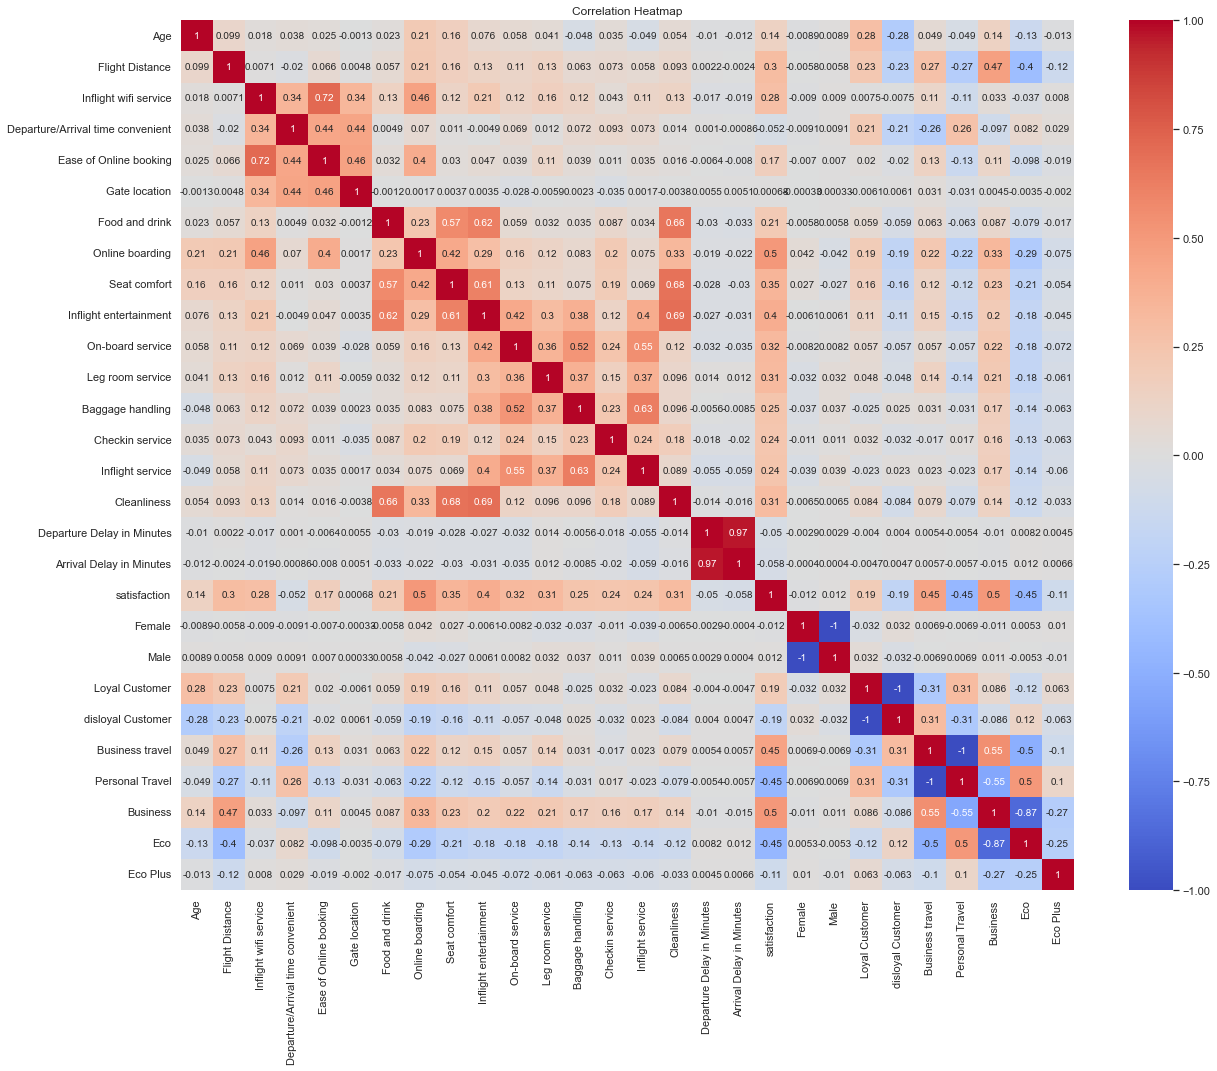

In [101]:
plt.figure(figsize=(20, 16))
sns.heatmap(dataset.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

Получилась интересная картина - нет какой-то явной корреляции между удовольствием пассажиров и представленными признаками. Действительно есть корреляция между классом и целью поездки. Но не такая большая как я думал. 

Вероятнее всего это зависит от нескольки признаков. Так как много фичей в датасете, которые являются голосованием, то попробуем сложить всё это и посмотреть что будет

In [102]:
dataset

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Female,Male,Loyal Customer,disloyal Customer,Business travel,Personal Travel,Business,Eco,Eco Plus
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,
70172,13,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,0,0,1,1,0,0,1,0,0,1
5047,25,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,0,0,1,0,1,1,0,1,0,0
110028,26,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,1,1,0,1,0,1,0,1,0,0
24026,25,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,0,1,0,1,0,1,0,1,0,0
119299,61,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,1,0,1,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94171,23,192,2,1,2,3,2,2,2,2,3,1,4,2,3,2,3,0.0,0,1,0,0,1,1,0,0,1,0
73097,49,2347,4,4,4,4,2,4,5,5,5,5,5,5,5,4,0,0.0,1,0,1,1,0,1,0,1,0,0
68825,30,1995,1,1,1,3,4,1,5,4,3,2,4,5,5,4,7,14.0,0,0,1,0,1,1,0,1,0,0


In [103]:
survey_features = [
    'Inflight wifi service',	
    'Departure/Arrival time convenient',
    'Ease of Online booking',	
    'Gate location',	
    'Food and drink',	
    'Online boarding',	
    'Seat comfort',	
    'Inflight entertainment',	
    'On-board service',	
    'Leg room service',	
    'Baggage handling',	
    'Checkin service',	
    'Inflight service',	
    'Cleanliness',
]

In [108]:
# так как чем выше оценка, тем лучше, то мы смело можем их сложить
dataset['total_survey_score'] = dataset[survey_features].sum(axis=1)

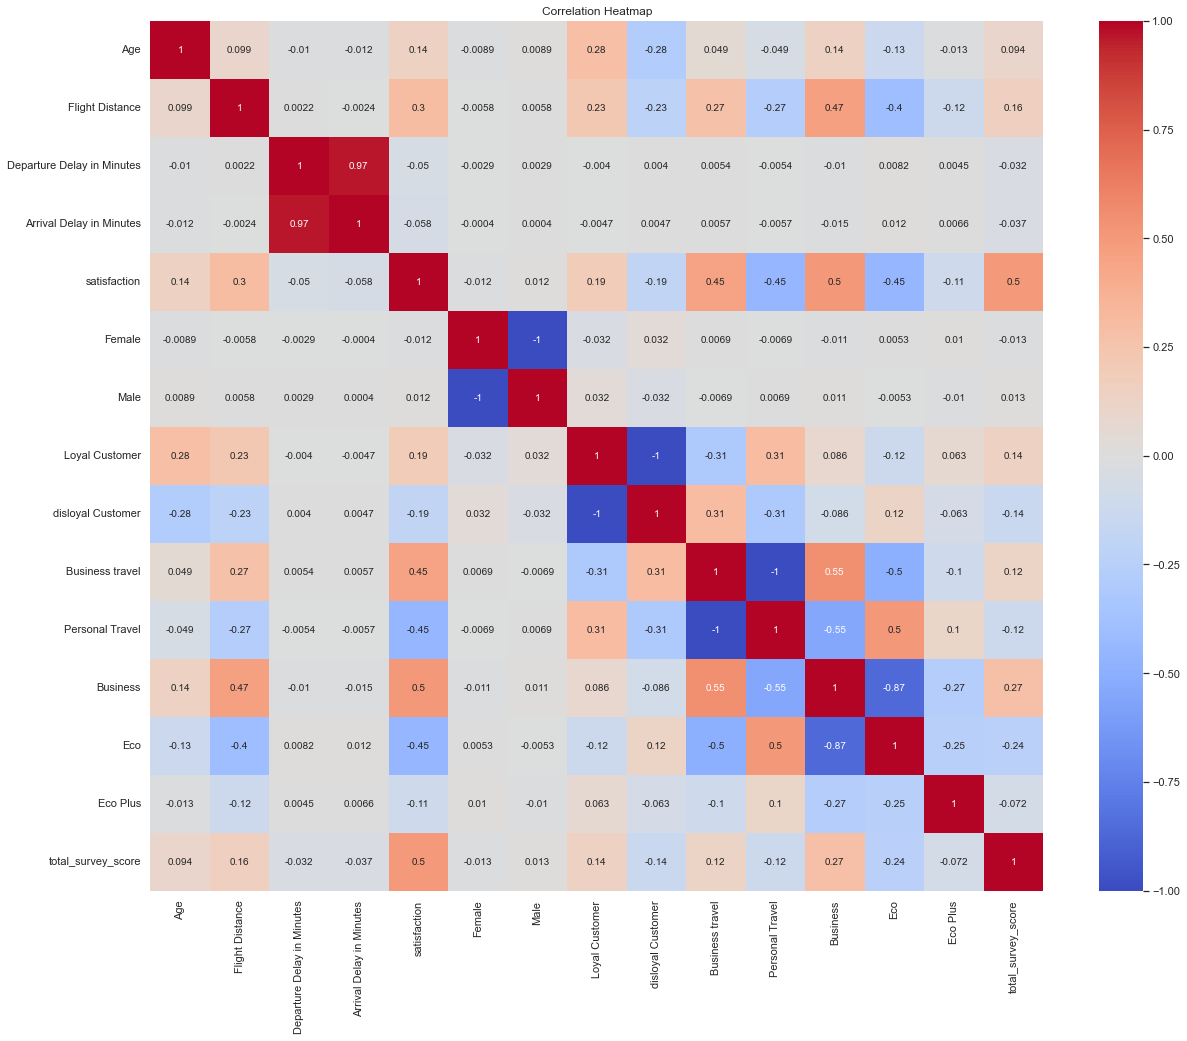

In [110]:
# Заменим все фичи по поросу только на сумму и посмотрим корряляцию

plt.figure(figsize=(20, 16))
sns.heatmap(dataset.drop(columns=survey_features).corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

Теперь мы видим заметную корреляцию. Построим линейную модель, которая будет стараться объяснить наши значения

In [119]:
dataset = dataset.dropna()

In [120]:
train, test = train_test_split(
    dataset, 
    test_size=0.3, 
    shuffle=True,
    stratify=dataset[TARGET],
    random_state=43
)

In [129]:
ridge_model = RidgeClassifier()
log_reg_model = LogisticRegression()

In [137]:
def train_model(model, train_dataset, target):
    X = train_dataset.drop(columns=target)
    y = train_dataset[target]
    model.fit(X, y)
    return model

def validate_model(model, test_dataset, target):
    y_true = test_dataset[target]
    y_pred = model.predict(test_dataset.drop(columns=target))

    print(classification_report(y_true, y_pred))

In [140]:
ridge_model = train_model(ridge_model, train, TARGET)
validate_model(ridge_model, test, TARGET)

              precision    recall  f1-score   support

           0       0.88      0.90      0.89     17610
           1       0.86      0.84      0.85     13469

    accuracy                           0.87     31079
   macro avg       0.87      0.87      0.87     31079
weighted avg       0.87      0.87      0.87     31079



In [143]:
log_reg_model = train_model(log_reg_model, train, TARGET)
validate_model(log_reg_model, test, TARGET)

              precision    recall  f1-score   support

           0       0.86      0.81      0.83     17610
           1       0.77      0.82      0.79     13469

    accuracy                           0.82     31079
   macro avg       0.81      0.82      0.81     31079
weighted avg       0.82      0.82      0.82     31079



Линейные модели справились неплохо. Попробуем использовать бустинг

In [147]:
catboost_model = CatBoostClassifier(verbose=False)

In [148]:
catboost_model = train_model(catboost_model, train, TARGET)
validate_model(catboost_model, test, TARGET)

              precision    recall  f1-score   support

           0       0.96      0.98      0.97     17610
           1       0.97      0.95      0.96     13469

    accuracy                           0.96     31079
   macro avg       0.97      0.96      0.96     31079
weighted avg       0.96      0.96      0.96     31079



Но бустинг справился ещё лучше. Значит существует какие-то неочевидные нелинейные признаки, которые отвечают за наслаждение полетом. 